## Time alignment and Normalization 
in understanding the duration of phonemes or syllables that change due to speaking rate
in Simple It is the process of synchronizing two or more speech signals in time, such that corresponding features (like phonemes or words) occur at the same time in each signal. This is critical for comparing, analyzing, or processing speech data from different sources or speakers.


Normalization: refers to the process of adjusting the speech signal to standardize its features, such as amplitude or duration, ensuring uniformity across signals. 

## Linear time Normalization
is the process of uniformly scaling the time axis of a speech signal to match a standard duration of time frame here LTN assumes the constant scaling factor across the entire signal 

Mathematically lets say we s(t) a speech signal where t is time variable and rescaling factor is given by 

r=T(target)/T(original)


Normalized time is defined by 

t(norm)=t*r
where r is the rescaling factor

resampling the signal 
snorm(t')=s(t/r)


In [460]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [461]:
s1=np.array([0.2,0.4,0.6,0.8,1.0,0.8,0.6,0.4,0.2])
s2=([0.2,0.3,0.5,0.7,0.9,1.0,0.9,0.7,0.5,0.4,0.3,0.2])


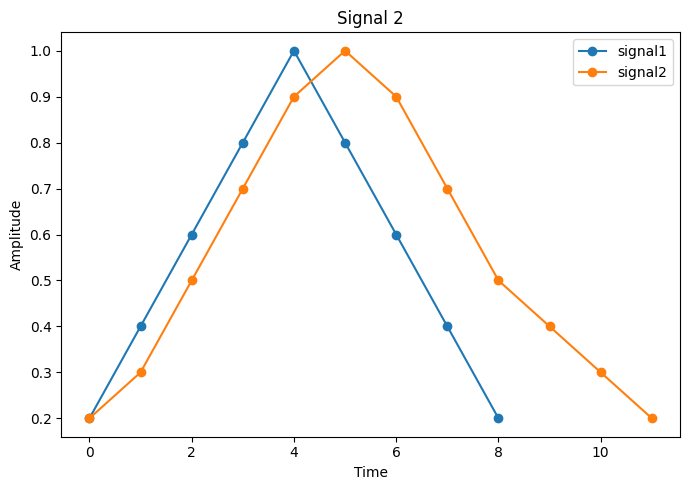

In [462]:
plt.figure(figsize=(7,5))


plt.plot(s1,label='signal1',marker='o')
plt.title("Signal 1")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.plot(s2,label='signal2',marker='o')
plt.title("Signal 2")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.legend()

plt.tight_layout()
plt.show()

In [463]:
 #(b)Perform Linear Time Normalization for the two sequences.

scaling_fact=np.linspace(0,len(s2)-1,len(s1))
normalized_signal=np.interp(scaling_fact, np.arange(len(s2)),s2)

In [464]:
scaling_fact

array([ 0.   ,  1.375,  2.75 ,  4.125,  5.5  ,  6.875,  8.25 ,  9.625,
       11.   ])

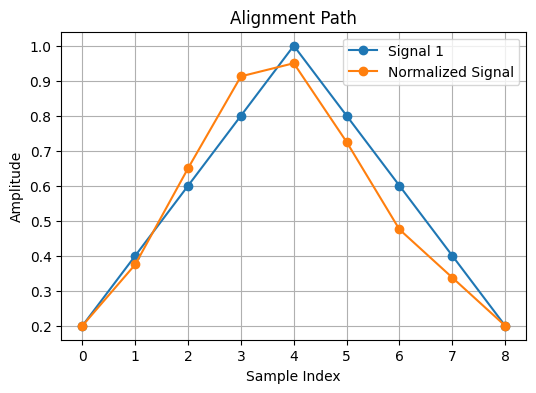

In [465]:
# Plot the alignment path

plt.figure(figsize=(6,4))
plt.plot(s1,label="Signal 1",marker='o')
plt.plot(normalized_signal,label="Normalized Signal",marker='o')
plt.title("Alignment Path")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

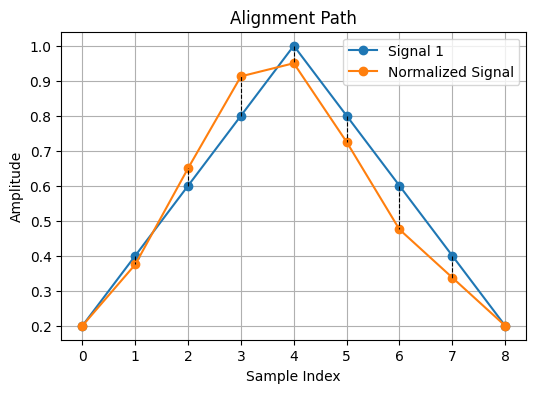

In [466]:
alignment_path=list(zip(s1,normalized_signal))
# Plot the alignment path

plt.figure(figsize=(6,4))
plt.plot(s1,label="Signal 1",marker='o')
plt.plot(normalized_signal,label="Normalized Signal",marker='o')
for i ,(s1,s2) in enumerate(alignment_path):
    plt.plot([i,i],[s1,s2],color='black',linestyle='--', linewidth=0.8)
plt.title("Alignment Path")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [467]:
#(e): Discussion
print("Linear Time Normalization aligns Signal 2 to Signal 1 by stretching or compressing it.")
print("The normalized Signal 2 is interpolated to match the length of Signal 1.")
print("Alignment Path (Sample-wise):")
for i, (s1, s2) in enumerate(alignment_path):    print(f"Sample {i + 1}: Signal 1 = {s1}, Normalized Signal 2 = {s2}")

Linear Time Normalization aligns Signal 2 to Signal 1 by stretching or compressing it.
The normalized Signal 2 is interpolated to match the length of Signal 1.
Alignment Path (Sample-wise):
Sample 1: Signal 1 = 0.2, Normalized Signal 2 = 0.2
Sample 2: Signal 1 = 0.4, Normalized Signal 2 = 0.375
Sample 3: Signal 1 = 0.6, Normalized Signal 2 = 0.6499999999999999
Sample 4: Signal 1 = 0.8, Normalized Signal 2 = 0.9125
Sample 5: Signal 1 = 1.0, Normalized Signal 2 = 0.95
Sample 6: Signal 1 = 0.8, Normalized Signal 2 = 0.725
Sample 7: Signal 1 = 0.6, Normalized Signal 2 = 0.475
Sample 8: Signal 1 = 0.4, Normalized Signal 2 = 0.3375
Sample 9: Signal 1 = 0.2, Normalized Signal 2 = 0.2


## Inference

Linear Time Normalization ensures that both signals are of the same length while preserving their respective patterns. This is helpful in comparing signals sampled at different rates or spoken at different speeds.



## LAB - 6-Dynamic Time Warping (DTW) to compare and align two numerical sequences (vectors).

Dynamic Time Warping (DTW): A common method to achieve time alignment. It minimizes the distance between two time series (speech signals) by nonlinearly warping their time axes.



The equation for **Dynamic Time Warping (DTW)** that minimizes the distance between two time series $ X = \{x_1, x_2, ..., x_m\} $ and $ Y = \{y_1, y_2, ..., y_n\} $ is as follows:

$
D_{DTW}(X, Y) = \min_{\mathbf{W}} \sum_{k=1}^{K} d(x_{i_k}, y_{j_k})
$

where:
- $ \mathbf{W} = \{(i_k, j_k)\} $ is the warping path,
- $ d(x_{i_k}, y_{j_k}) $ is the distance metric (commonly Euclidean distance),
- $ K $ is the length of the warping path, and
- $ i_k $ and $ j_k $ are indices of the warping path corresponding to the elements in sequences $ X $ and $ Y $.

This equation seeks to minimize the cumulative distance over the optimal warping path $ \mathbf{W} $.

here after finding the min distance we compute the cost matrix D(i,j)

where the recurrence relation
$
D(i,j)=\text{dist}(X_i, Y_j) + \min \left( D(i-1,j), D(i,j-1), D(i-1,j-1) \right)$


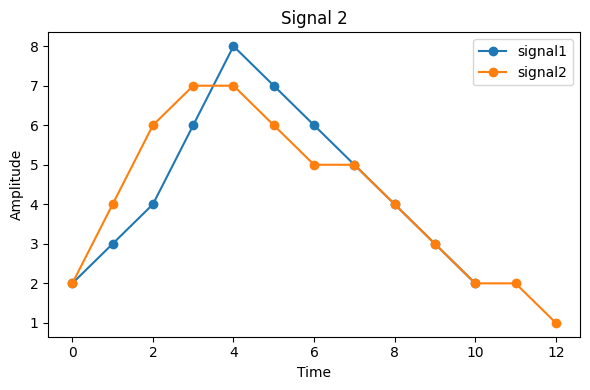

In [468]:
Vector1=np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
Vector2=np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

plt.figure(figsize=(6,4))


plt.plot(Vector1,label='signal1',marker='o')
plt.title("Signal 1")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.plot(Vector2,label='signal2',marker='o')
plt.title("Signal 2")
plt.xlabel('Time')
plt.ylabel('Amplitude')


plt.legend()

plt.tight_layout()
plt.show()

In [469]:
import numpy as np


def DTW(Vector1, Vector2):
    len_v1 = len(Vector1)
    len_v2 = len(Vector2)

    # Cost matrix
    cost = np.zeros((len_v1,len_v2))
    
    # Compute the cost matrix
    for i in range(len_v1):
        for j in range(len_v2):
            cost[i, j] = abs(Vector1[i] - Vector2[j])

    # Initialize the total cost matrix
    total_cost = np.zeros((len_v1, len_v2))
    total_cost[0,0] = cost[0,0]

    # Fill the first row and first column
    
    for i in range(1, len_v1):
        total_cost[i, 0] = float("inf")
    for j in range(1, len_v2):
        total_cost[0, j] =float("inf")

    # Fill the rest of the total cost matrix
    for i in range(1, len_v1):
        for j in range(1, len_v2):
            total_cost[i, j] = min(total_cost[i - 1, j],     # From the top
                                   total_cost[i, j - 1],     # From the left
                                   total_cost[i - 1, j - 1]) # From the diagonal
            total_cost[i, j] += cost[i, j]

    return total_cost


In [470]:
#total cost compute


total_cost_matrix=DTW(Vector1,Vector2)
total_cost_matrix=np.flip(total_cost_matrix,axis=1)

print("Total Cost Matrix or Distance matrix :", total_cost_matrix.transpose())

Total Cost Matrix or Distance matrix : [[inf 24. 21. 23. 25. 26. 22. 15. 10.  6.  3.]
 [inf 22. 18. 18. 20. 21. 17. 11.  7.  4.  2.]
 [inf 21. 16. 14. 16. 17. 13.  8.  5.  3.  2.]
 [inf 20. 14. 10. 12. 13.  9.  5.  3.  2.  3.]
 [inf 20. 13.  7.  9. 10.  6.  3.  2.  3.  5.]
 [inf 19. 13.  5.  7.  7.  4.  2.  3.  5.  8.]
 [inf 17. 12.  4.  6.  5.  3.  2.  3.  5.  8.]
 [inf 15. 11.  3.  5.  3.  2.  3.  5.  8. 12.]
 [inf 12.  9.  3.  3.  2.  3.  5.  8. 12. 16.]
 [inf  8.  6.  2.  2.  2.  3.  5.  8. 11. 15.]
 [inf  4.  3.  1.  3.  4.  4.  5.  7. 10. 14.]
 [inf  1.  1.  3.  7. 10. 12. 13. 13. 14. 16.]
 [ 0. inf inf inf inf inf inf inf inf inf inf]]


In [471]:
def DTW_tracer(total_cost_matrix):
    row,col=total_cost_matrix.shape
    i,j=row-1,col-1
    path=[(i,j)]

    #tracing from (0,0) to row,col of top right
    while i>0 and j>0:
        if i==0:
            j-=1
        elif j==0:
            i-=1
        else:
            min_val=np.argmin([total_cost_matrix[i-1,j],total_cost_matrix[i,j-1],total_cost_matrix[i-1,j-1]])
            if min_val==0:
                i-=1
            elif min_val==1:
                j-=1
            else:
                i-=1
                j-=1
            path.append((i,j))
            return path[::-1]  


In [472]:
#low cost path
low_cost_path=DTW_tracer(total_cost_matrix)
print("low cost path\:",low_cost_path)



low cost path\: [(9, 11), (10, 12)]


In [473]:
#calculation of DTW distance
Vector1=np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
Vector2=np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])
warping_path=DTW_tracer(total_cost_matrix)
dtw_distance = total_cost_matrix[len(Vector1) - 1, len(Vector2) - 1]

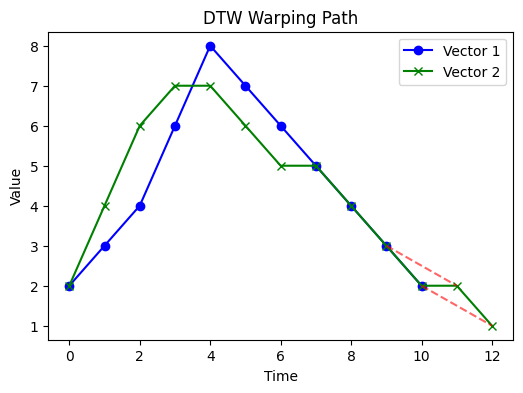

In [474]:
# Visualizing the warping path
plt.figure(figsize=(6, 4))
plt.plot(Vector1, label='Vector 1', color='blue', marker='o')
plt.plot(Vector2, label='Vector 2', color='green', marker='x')

# Plot the warping path
for (i, j) in warping_path:
    plt.plot([i, j], [Vector1[i], Vector2[j]], color='red', linestyle='--', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('DTW Warping Path')
plt.legend()
plt.show()



INFERENCE 
in the Above code we see that the warping path aligns the vectors by finding a non linmear mapping with the indices by minimizinmg the total cost

each path compensate the differences in length of vectors and the variations in sequences 

The path tends to move diagonally through the matrix (optimal alignment), but it can deviate vertically or horizontally to match repeated values


Indication of the DTW
the distance of The DTW quantifies the overall cost of aligning the two vectors. A smaller DTW distance indicates higher similarity, while a larger DTW distance suggests significant dissimilarity.
The distance reflects how much "work" is required to warp one vector to match the other.


In [475]:
import numpy as np


def DTW(Vector1, Vector2):
    len_v1 = len(Vector1)
    len_v2 = len(Vector2)

    # Cost matrix
    cost = np.zeros((len_v1,len_v2))
    
    # Compute the cost matrix
    for i in range(len_v1):
        for j in range(len_v2):
            cost[i, j] = abs(Vector1[i] - Vector2[j])

    # Initialize the total cost matrix
    total_cost = np.zeros((len_v1, len_v2))
    total_cost[0,0] = cost[0,0]

    # Fill the first row and first column
    
   # Fill first row and column
    for i in range(1, len_v1):
        total_cost[i, 0] = total_cost[i - 1, 0] + cost[i, 0]
    for j in range(1, len_v2):
        total_cost[0, j] = total_cost[0, j - 1] + cost[0, j]

    # Fill the rest of the total cost matrix
    for i in range(1, len_v1):
        for j in range(1, len_v2):
            total_cost[i, j] = min(total_cost[i - 1, j],     # From the top
                                   total_cost[i, j - 1],     # From the left
                                   total_cost[i - 1, j - 1]) # From the diagonal
            total_cost[i, j] += cost[i, j]

    return total_cost


In [476]:
Vector1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
Vector2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

total_cost_matrix = DTW(Vector1, Vector2)
total_cost_matrix=np.flip(total_cost_matrix,axis=1)
warping_path=DTW_tracer(total_cost_matrix)

dtw_distance = total_cost_matrix[-1, -1]  # Bottom-right corner
print("DTW Distance:", dtw_distance)
print("Total Cost Matrix:",total_cost_matrix.transpose())


DTW Distance: 28.0
Total Cost Matrix: [[30. 24. 21. 23. 25. 26. 22. 15. 10.  6.  3.]
 [29. 22. 18. 18. 20. 21. 17. 11.  7.  4.  2.]
 [29. 21. 16. 14. 16. 17. 13.  8.  5.  3.  2.]
 [29. 20. 14. 10. 12. 13.  9.  5.  3.  2.  3.]
 [28. 20. 13.  7.  9. 10.  6.  3.  2.  3.  5.]
 [26. 19. 13.  5.  7.  7.  4.  2.  3.  5.  8.]
 [23. 17. 12.  4.  6.  5.  3.  2.  3.  5.  8.]
 [20. 15. 11.  3.  5.  3.  2.  3.  5.  8. 12.]
 [16. 12.  9.  3.  3.  2.  3.  5.  8. 12. 16.]
 [11.  8.  6.  2.  2.  2.  3.  5.  8. 11. 15.]
 [ 6.  4.  3.  1.  3.  4.  4.  5.  7. 10. 14.]
 [ 2.  1.  1.  3.  7. 10. 12. 13. 13. 14. 16.]
 [ 0.  1.  3.  7. 13. 18. 22. 25. 27. 28. 28.]]


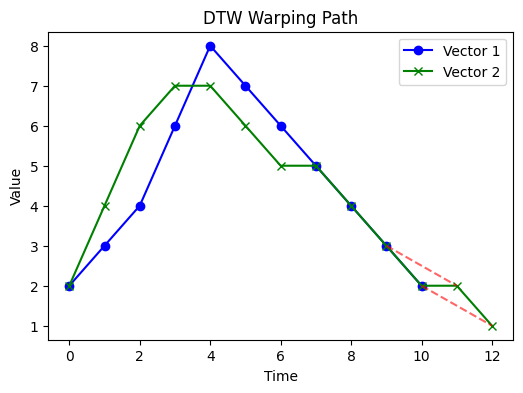

In [477]:
# Visualizing the warping path
plt.figure(figsize=(6,4))
plt.plot(Vector1, label='Vector 1', color='blue', marker='o')
plt.plot(Vector2, label='Vector 2', color='green', marker='x')

# Plot the warping path
for (i, j) in warping_path:
    plt.plot([i, j], [Vector1[i], Vector2[j]], color='red', linestyle='--', alpha=0.6)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('DTW Warping Path')
plt.legend()
plt.show()

